# Natural Disasters and Climate Change

It has long been accepted that there is a large scale anthropogenic climate change occuring on our planet (Hansen and Stone, 2016, Barnett et al., 2001). The unprecidented release of greenhouse gases post industrial revolution has resulted in a unbalance in our fragile ecosystem (Lashof and Ahuja, 1990). This has many side effects including, polar ice melting, increasing extreme temperatures, flooding, change in climate in all continents and more (United Nations, nda). One such effect that is seldom talked about is the effect that climate change has on prevelence of Natural Disasters (Van Aalst, 2006). These data record all natural disasters from 1970-2021 including magnitude, impacts, and type of disaster. We will investigate if there has been an increase in prevelance, or impact, since 1970. 

Data found: https://www.kaggle.com/datasets/brsdincer/all-natural-disasters-19002021-eosdis

Github link : https://github.com/barnettella/EverythingCounts_Assessment2

# Literature Review

As the effects of anthropogenic climate change have grown, much research has evidenced that the increase of greenhouse gases in our climate has had numerous catastrophic effects on our global climate. Evidence has grown that the shift in our equili brium has contributed to an increase in natural diaster events (Van Aalst, 2006, Banholzer et al., 2014, Hallegatte, 2014, and Benevolenza, 2018). Natural Disasters include earthquakes, volcanic erruptions, mass movement, tsunamis, and more (Planetary Health Aliance, nda). These can occur due to shifts in the Earth's crust, or due to small pressure changes and compounding factors. There is also evidence that these natural disasters are increasing in magnitude and impacts (Ibarrarán et al., 2009, Dey and Lewis, 2021).

There is, however, a growing opposition to this point of view. Some argue that the increase we have observed is due to an increase in recording equipment and globalisation (Alimonti and Mariani, 2022). Others point out that the increase in natural disasters may be a secondary effect (Sapir and LeChat, 1986), primary effects like an increase in precipitation may increase the likelihood of a flash flood, but this is a secondary impact rather than climate change having a direct impact. 

These data may help us to observe an increase in the occurence of Natural disasters, but more research must be done to investigate the reason for this potential increase. 

Research also suggests that the impacts and magnitiude of these disasters are increasing (Van Aalst, 2006, and Benevolenza and DeRigne, 2018). Impacts include higher death tolls, greater displacement of peoples, and an increase in economic impacts (Kellenberg and Mobarak, 2008). The observed increase here may be due to any number of factors including urbanisation, increasing population, and global wealth increase (Julca, 2014, and Van der Vink et al., 2006). These data will also allow us to investigate this observed increase in severity of impacts. 

We can create hypothesis to test based on the above literature review. 

# Importing the data

In [1]:
# Import Warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


# Importing the data as a dataframe
data = pd.read_csv('1970-2021_DISASTERS.csv', encoding='unicode_escape')

# Desribing the data (rows, columns) 
data.shape

(14644, 47)

In [2]:
# Clarifying data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO                              14644 non-null  object 
 12  Region            

# Hypothesis testing

We will test all hypotheses at the 0.05 p value level, as this is the standard for most statistical tests.

### Hypothesis 1

Literature demonstrates that there has been an increase in Natural Disasters since 1970 due to the impact of anthropogenic climate change. We explore this below

**H<sub>1</sub>** - There is an increase in recorded Natural Disasters from 1970-2021

**H<sub>0</sub>** - There is no observable difference between recorded Natural Disasters in 1970-2021

Here we are testing a monotonic trend, an increase that may not be linear. To test this we must do a Mann-Kendall Test.

### Wrangling

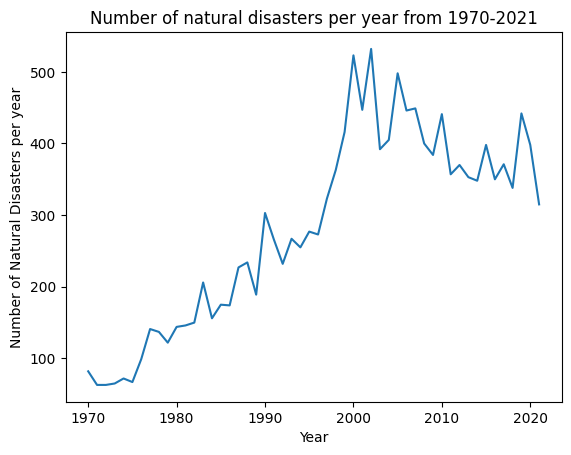

In [3]:
# Grouping the data by year
grouped_by_year = data.groupby('Year')

# We can see the raw numbers of natural disasters by using groupby
num_per_year = grouped_by_year.size()

# We can plot these
plt.plot(num_per_year) 
plt.title('Number of natural disasters per year from 1970-2021')
plt.xlabel('Year')
plt.ylabel('Number of Natural Disasters per year')
plt.show()

Data appears to be increasing, but we must test if this is a significant increase in order to fail to reject or reject our H<sub>0<sub/>

### Testing

In [4]:
# Installing the testung library
%pip install pymannkendall

Note: you may need to restart the kernel to use updated packages.


In [5]:
# naming this an easier name
import pymannkendall as mk
 
# perform Mann-Kendall Trend Test
mk.original_test(num_per_year)

Mann_Kendall_Test(trend='increasing', h=np.True_, p=np.float64(6.262101948095733e-12), z=np.float64(6.8735554973238076), Tau=np.float64(0.6576168929110106), s=np.float64(872.0), var_s=np.float64(16057.333333333334), slope=np.float64(7.768888888888888), intercept=np.float64(91.89333333333335))

### Discussion

These test results show an increasing trend, with a P value of 6.26 x 10^-12 (2dp). As our P value is below 0.05 we can reject our H<sub>0</sub>. We can be confident in this rejection as we have fulfilled all of the requirements of a Mann-Kendall test (no autocorrelation, above minimum number of samples (4), and, as far as we know, the data set is representative). This means there is a significant increasing trend in the data, and it is very unlikely these results have occured due to chance. This supports the literature which suggests that climate change has increased occurance of natural disasters. 

Despite this, we cannot ignore the literature that suggests that this increase is due to a growth in reporting and measuring technology worldwide, which will also increase the number of recorded natural diasters. We cannot see within our data what the cause of this increase may be, therefore we cannot fully support a conclusion that climate change has increased natural disasters using this data set and test. 

### Hypothesis 2

Despite this restriction in the data, literature also shows an increase in social and economic impacts from these natural disasters. Our data set demonstrates various different measures for social impacts, but we will focus on the number of deaths per event as this is the most significant social impact that natural disasters can have.

**H<sub>2</sub>** - There is a difference the average number of deaths per disaster between 1970 and 2021

**H<sub>0</sub>** - There is no observable difference in the average number of deaths per disaster between 1970 and 2021

As a year can function as either categoric or numerical data, we will treat it in this case as a numerical value due to the numerical continuous data in our no. deaths count. Therefore the most suitable test here is a T-test.

Missing data will be omitted during the test.

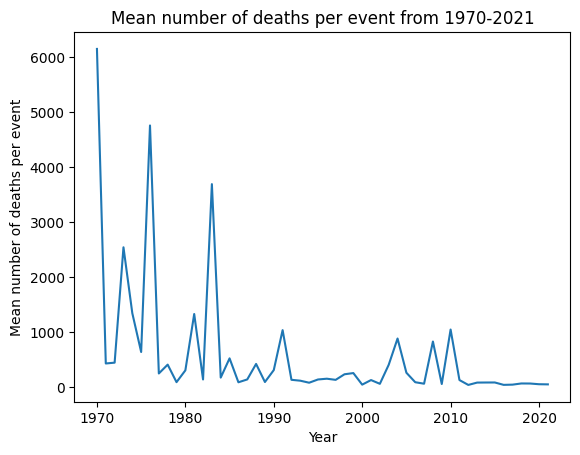

In [6]:
# Calculating and plotting averages

# Creating a data frame of total deaths and year
deaths_per_event = grouped_by_year[['Total Deaths']]

# Calculating the average of deaths per event per year
deaths_mean = deaths_per_event.mean()

# plotting these
plt.plot(deaths_mean) 
plt.title('Mean number of deaths per event from 1970-2021')
plt.xlabel('Year')
plt.ylabel('Mean number of deaths per event')
plt.show()

In [7]:
# Assigning variables
mean_1970 = deaths_per_event.get_group(1970)

mean_2021 = deaths_per_event.get_group(2021)

# Performing T Test
scipy.stats.ttest_ind(mean_1970, mean_2021, axis=0, equal_var=True, nan_policy='omit', permutations=None, random_state=None, alternative='two-sided', trim=0, keepdims=False)

TtestResult(statistic=array([2.19245051]), pvalue=array([0.02926178]), df=array([252.]))

### Discussion

As our P value is 0.03, below 0.05, we can reject the H<sub>0</sub> in this case. This means that the difference in the means is unlikely to have occured due to change. However, when we look at the averages of deaths per event plotted above, we can see the trend apears to be decreasing over time. This goes against the hegemony explored in the above literature. Perhaps this alternative trend could be explained due to increasing technology and healthcare that allow those who are injured to be treated. More research must be done with more in depth data to examine this trend more. 

It is not improbable that there is one event during 1970 that increases the average exponetially, thereby skewing the data. We can examine this by finding the max value for deaths per year.

In [8]:
# printing the maximum value per year
deaths_per_event.max()

,Total Deaths
Year,
1970,300000.0
1971,9658.0
1972,10000.0
1973,100000.0
1974,28700.0
1975,20000.0
1976,242000.0
1977,14204.0
1978,25000.0


Given the maximum value in 1970 was 3 million deaths, but in 2021 it was only 2,577, it could be the case that one extreme anomalous event has increased the average of that year which may have affected our test result. The sample size for events in 1970 is much smaller than those for 2021, so outliers will make more of an impact in the average calculated, despite the sample size being representative of the events that occured. This difference could have affected the results of this test, however, given that the degrees of freedom is so high, suggesting that our sample sizes were appropriate, this is unlikely to have affected our test to the point of striking it off. Therefore, although the difference in the mean of each year is unlikley to be due to chance, our conclusions must consider these limitations. 

### Hypothesis 3

Social impacts may also be measured basedon number of individuals affected by the disaster. This may give us a different result to our results based on number of deaths as we saw the opposite trend than we expected with that data set. We can investigate an increase in this trend using our data to examine further social impacts.

**H<sub>3</sub>** - There is a difference the average number people affected per disaster between 1970-2021

**H<sub>0</sub>** - There is no observable difference in the average number of people affected per disaster between 1970-2021

We will test these data with another T-test. Missing data will be omitted during the test.

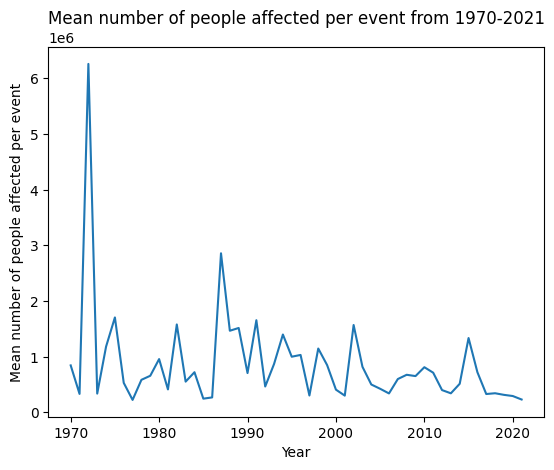

In [9]:
# Calculating and plotting averages

# assigning data frame of year and total affected
affected_per_event = grouped_by_year[['Total Affected']]

# calculating the mean 
affected_mean = affected_per_event.mean()

# plotting this to observe trend 
plt.plot(affected_mean) 
plt.title('Mean number of people affected per event from 1970-2021')
plt.xlabel('Year')
plt.ylabel('Mean number of people affected per event')
plt.show()

In [10]:
# testing

# assigning variables
mean_1970 = affected_per_event.get_group(1970)

mean_2021 = affected_per_event.get_group(2021)

# t test
scipy.stats.ttest_ind(mean_1970, mean_2021, axis=0, equal_var=True, nan_policy='omit', permutations=None, random_state=None, alternative='two-sided', trim=0, keepdims=False)

TtestResult(statistic=array([3.04593045]), pvalue=array([0.00251003]), df=array([324.]))

### Discussion

Our P value for this test was also below 0.05, at 0.0025, allowing us to reject the H<sub>0</sub> as there is a less than 5% chance (0.25%) that these results occured due to chance. However, when we observe the trend in the above data, it appears to be decreasing, yet again opposing the trend expected in the literature. This is interesting, particularly given our extremely high degrees of freedom suggesting that our sample size is not a contributer to this unexpected trend. More research could be done here, including observing if this trend is replicated on a smaller locational scale. 

### Hypothesis 4

The economic impact of these events is measured in this data set in US$. We can investigate whether our data supports the literature in an observed increase here.

**H<sub>4</sub>** - There is a difference in the average US$ of damage per disaster between 1970-2021

**H<sub>0</sub>** - There is no observable difference in the average US$ of damage per disaster between 1970-2021

This requires another T-test. Missing data will be omitted during the test.

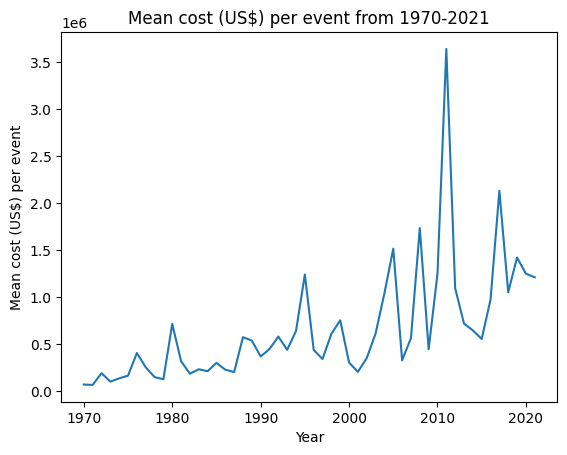

In [11]:
# Calculating and plotting averages

# assigning dataframe with total damages and year
dollars_per_event = grouped_by_year[["Total Damages ('000 US$)"]]

# calculating the mean
dollars_mean = dollars_per_event.mean()

# plotting this to observe the trend
plt.plot(dollars_mean) 
plt.title('Mean cost (US$) per event from 1970-2021')
plt.xlabel('Year')
plt.ylabel('Mean cost (US$) per event')
plt.show()

In [12]:
# testing

# assinging variables
mean_1970 = dollars_per_event.get_group(1970)

mean_2021 = dollars_per_event.get_group(2021)

# t test
scipy.stats.ttest_ind(mean_1970, mean_2021, axis=0, equal_var=True, nan_policy='omit', permutations=None, random_state=None, alternative='two-sided', trim=0, keepdims=False)

TtestResult(statistic=array([-1.91621561]), pvalue=array([0.05767714]), df=array([122.]))

### Discussion

As our P value is above 0.05, we cannot reject the H<sub>0</sub> as there is a larger than 5% probability that our results occured due to chance. Despite this, our P value was only 0.007 above a 0.05 p value, suggesting that there is still a low probability of these results being due to chance. While we fail to reject the H<sub>0</sub>, the small P value here suggests a trend towards a significant difference in the data. Our graph shows an increasing trend, but we cannot say that the difference between 1970 and 2021 is significant. Further data or analysis may provide more clarity, for example, testing the trend itself with a Mann-Kendall Test. 

Perhaps, more recent data from 2023 or 2024 would provide more clarity on the trends and differences here.  

# Final Thoughts and Conclusions

From these data, we can support a significant increasing trend in numbers of Natural disasters. As discussed, we cannot claim that these are a result of climate change, as the influence of increasing reporting and recording or disasters may have casue this observable trend. If we were able to control for the recording methods used for each disaster event we may be able to explore the impacts that climate change may have had more thoroughly.

We also find evidence that there is a significant difference between social impacts in 1970 and 2021, specifically number of deaths and number of people impacted. The observed directiond here, however, are a decrease, conflicting with the hegemony discussed in the dominant literature. This unexpected result could be due to anomalous events in either year, as discussed, and as such further test could be conducted on different time frames, or narrowing down data to smaller locational scales to further examine this relationship. As our data stands, we reject the H<sub>0</sub> and acknowledge that there is a low chance that the difference observed is due to chance, but we do not find that the data supports the literature in directionality. 

Finally, we fail to reject the H<sub>0</sub> when considering economic impacts (cost per event), finding that any difference observed between US$ per diaster between 1970 and 2021 has a higher than 5% probability of being due to chance. Despite this, our P value was so small that it suggests a trend towards a significant difference, which is interesting. More recent data may help to demonstrate more clarity here in giving us an u

Overall, we acknowldge that natural diasters numbers are increasing, but the causality here is unclear. These data also suggest there is a significant difference between social impacts (people affected and deaths) in 1970 and 2021, but more research is needed here to examine this trend. These data find do not find sufficient evidence to suggest a significant difference between the cost (in U$) per event in 1970 and 2021, so we fail to reject the H<sub>0</sub>.

# References

Alimonti, G. and Mariani, L. (2024) ‘Is the number of global natural disasters increasing?’, Environmental Hazards, 23(2), pp. 186–202. Available at: https://doi.org/10.1080/17477891.2023.2239807.


Banholzer, S., Kossin, J. and Donner, S. (2014) ‘The Impact of Climate Change on Natural Disasters’, in A. Singh and Z. Zommers (eds) Reducing Disaster: Early Warning Systems For Climate Change. Dordrecht: Springer Netherlands, pp. 21–49. Available at: https://doi.org/10.1007/978-94-017-8598-3_2.


Barnett, T.P., Pierce, D.W. and Schnur, R. (2001) ‘Detection of Anthropogenic Climate Change in the World’s Oceans’, Science, 292(5515), pp. 270–274. Available at: https://doi.org/10.1126/science.1058304.


Benevolenza, M.A. and DeRigne, L. (2019) ‘The impact of climate change and natural disasters on vulnerable populations: A systematic review of literature’, Journal of Human Behavior in the Social Environment [Preprint]. Available at: https://www.tandfonline.com/doi/abs/10.1080/10911359.2018.1527739 (Accessed: 5 January 2025).


Dey, R. and Lewis, S.C. (2021) ‘Chapter 6 - Natural disasters linked to climate change’, in T.M. Letcher (ed.) The Impacts of Climate Change. Elsevier, pp. 177–193. Available at: https://doi.org/10.1016/B978-0-12-822373-4.00004-5.


Dincer, B. (no date) The Climate Change Twitter Dataset. Available at: https://www.kaggle.com/datasets/deffro/the-climate-change-twitter-dataset (Accessed: 5 January 2025).


Hallegatte, S. (2014) ‘Trends in Hazards and the Role of Climate Change’, in S. Hallegatte (ed.) Natural Disasters and Climate Change: An Economic Perspective. Cham: Springer International Publishing, pp. 77–97. Available at: https://doi.org/10.1007/978-3-319-08933-1_4.


Hansen, G. and Stone, D. (2016) ‘Assessing the observed impact of anthropogenic climate change’, Nature Climate Change, 6(5), pp. 532–537. Available at: https://doi.org/10.1038/nclimate2896.


Ibarrarán, M.E. et al. (2009) ‘Climate change and natural disasters: macroeconomic performance and distributional impacts’, Environment, Development and Sustainability, 11(3), pp. 549–569. Available at: https://doi.org/10.1007/s10668-007-9129-9.


Julca, A. (2012) ‘Natural Disasters with Un-Natural Effects: Why?’, Journal of Economic Issues, 46(2), pp. 499–510. Available at: https://doi.org/10.2753/JEI0021-3624460225.
Kellenberg, D.K. and Mobarak, A.M. (2008) ‘Does rising income increase or decrease damage risk from natural disasters?’, Journal of Urban Economics, 63(3), pp. 788–802. Available at: https://doi.org/10.1016/j.jue.2007.05.003.


Lashof, D.A. and Ahuja, D.R. (1990) ‘Relative contributions of greenhouse gas emissions to global warming’, Nature, 344(6266), pp. 529–531. Available at: https://doi.org/10.1038/344529a0.
Nations, U. (nda) What Is Climate Change?, United Nations. United Nations. Available at: https://www.un.org/en/climatechange/what-is-climate-change (Accessed: 23 October 2024).


Planetary Health Alliance (nda) Natural Disasters, Planetary Health Alliance. Available at: https://www.planetaryhealthalliance.org/natural-disasters (Accessed: 5 January 2025).


SAPIR, D.G. and LECHAT, M.F. (1986) ‘Reducing the impact of natural disasters: why aren’t we better prepared?’, Health Policy and Planning, 1(2), pp. 118–126. Available at: https://doi.org/10.1093/heapol/1.2.118.


Van Aalst, M.K. (2006) ‘The impacts of climate change on the risk of natural disasters’, Disasters, 30(1), pp. 5–18. Available at: https://doi.org/10.1111/j.1467-9523.2006.00303.x.
Van Der Vink, G. et al. (1998) ‘Why the United States is becoming more vulnerable to natural disasters’, Eos, Transactions American Geophysical Union, 79(44), pp. 533–537. Available at: https://doi.org/10.1029/98EO00390.
